<a href="https://colab.research.google.com/github/Arisoa04/IAE_METZ_DATA_2025_6/blob/main/TP_Group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importation des bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

2. Téléchargement des Données

In [ ]:
start_date = "2014-01-01"
end_date = "2024-01-01"
tickers = ["CVX", "EOG", "COP"]
benchmark_ticker = "^GSPC"

Télécharger les prix de clôture

In [ ]:
stocks_data = yf.download(tickers, start=start_date, end=end_date)["Close"]
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)["Close"]


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


Ajouter le benchmark aux données

In [ ]:
stocks_data["Benchmark"] = benchmark_data

Afficher un aperçu des données

In [ ]:
print(stocks_data.head())

Ticker            COP        CVX        EOG    Benchmark
Date                                                    
2014-01-02  48.317585  77.360512  61.660023  1831.979980
2014-01-03  48.442211  77.491348  61.488125  1831.369995
2014-01-06  48.649937  77.285736  61.286392  1826.770020
2014-01-07  48.726089  77.940048  62.343803  1837.880005
2014-01-08  48.255238  76.830803  62.317642  1837.489990


Nettoyage et Prétraitement des Données

In [ ]:
print("Vérification des valeurs manquantes :\n", stocks_data.isnull().sum())

Vérification des valeurs manquantes :
 Ticker
COP          0
CVX          0
EOG          0
Benchmark    0
dtype: int64


Supprimer les valeurs manquantes

In [ ]:
stocks_data = stocks_data.dropna()

4. Analyse Exploratoire des Données (EDA):
Distribution des prix de clôture

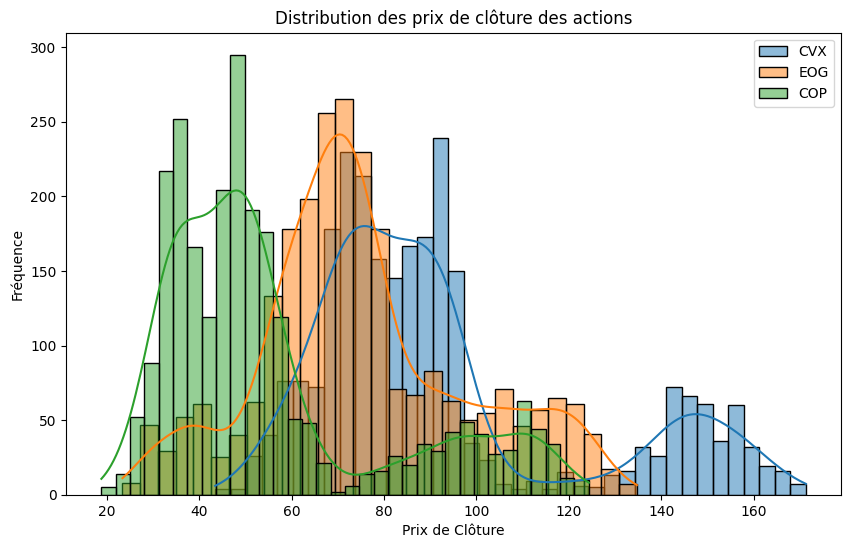

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(stocks_data["CVX"], kde=True, label="CVX")
sns.histplot(stocks_data["EOG"], kde=True, label="EOG")
sns.histplot(stocks_data["COP"], kde=True, label="COP")
plt.title("Distribution des prix de clôture des actions")
plt.xlabel("Prix de Clôture")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

Heatmap des corrélations

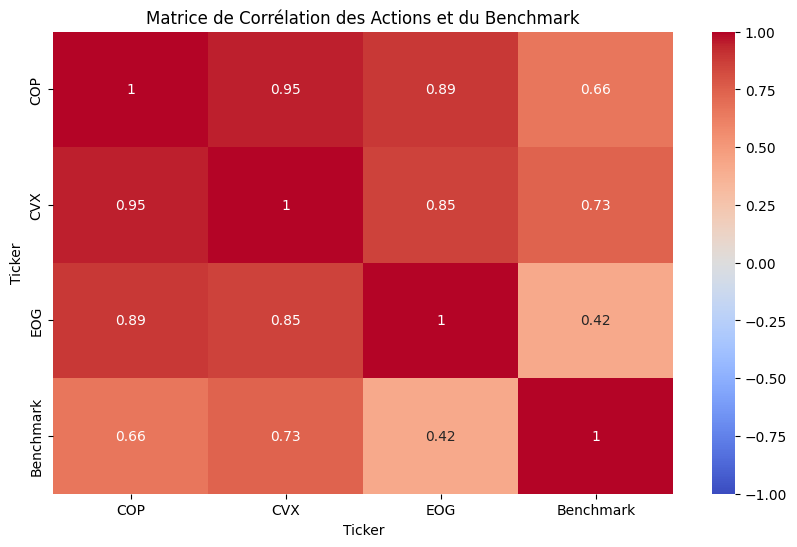

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(stocks_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de Corrélation des Actions et du Benchmark")
plt.show()


5. Calcul des Indicateurs de Performance

In [ ]:
risk_free_rate = 0.03
#Rendement et Volatilité annualisés
def annualized_return(returns, periods=252):
    return returns.mean() * periods

def annualized_volatility(returns, periods=252):
    return returns.std() * np.sqrt(periods)

stocks_returns = stocks_data.pct_change().dropna()
annual_returns = stocks_returns.apply(annualized_return)
annual_vols = stocks_returns.apply(annualized_volatility)


Ratio de Sharpe

In [ ]:
sharpe_ratios = (annual_returns - risk_free_rate) / annual_vols

#Afficher les résultats
print("\n Ratio de Sharpe :")
print(sharpe_ratios)


 Ratio de Sharpe :
Ticker
COP          0.333625
CVX          0.251716
EOG          0.288755
Benchmark    0.460579
dtype: float64


Ratio de Sortino

In [ ]:
def downside_volatility(returns, periods=252):
    downside_returns = returns[returns < 0]
    return downside_returns.std() * np.sqrt(periods)

sortino_ratios = (annual_returns - risk_free_rate) / stocks_returns.apply(downside_volatility)

#Afficher les résultats
print("\n Ratio de Sortino :")
print(sortino_ratios)


 Ratio de Sortino :
Ticker
COP          0.466108
CVX          0.327079
EOG          0.400279
Benchmark    0.558060
dtype: float64


Ratio de Treynor

In [ ]:
treynor_ratios = {}

for ticker in tickers:
    beta = model.params[1]
    annual_return = annual_returns[ticker]


    treynor_ratios[ticker] = (annual_return - risk_free_rate) / beta

#Afficher les résultats
print("\n Ratio de Treynor :")
print(treynor_ratios)

NameError: name 'model' is not defined

Affichage des indicateurs

In [ ]:
print("\nIndicateurs de Performance (2014-2024) :")
print(" Rendements annualisés :\n", annual_returns)
print(" Volatilités annualisées :\n", annual_vols)
print(" Ratios de Sharpe :\n", sharpe_ratios)
print(" Ratios de Sortino :\n", sortino_ratios)


Indicateurs de Performance (2014-2024) :
 Rendements annualisés :
 Ticker
COP          0.157773
CVX          0.104299
EOG          0.146687
Benchmark    0.111697
dtype: float64
 Volatilités annualisées :
 Ticker
COP          0.382983
CVX          0.295170
EOG          0.404102
Benchmark    0.177378
dtype: float64
 Ratios de Sharpe :
 Ticker
COP          0.333625
CVX          0.251716
EOG          0.288755
Benchmark    0.460579
dtype: float64
 Ratios de Sortino :
 Ticker
COP          0.466108
CVX          0.327079
EOG          0.400279
Benchmark    0.558060
dtype: float64


Calcul des rendements cumulés

In [ ]:
cumulative_returns = (1 + stocks_returns).cumprod()
benchmark_cumulative_returns = (1 + benchmark_data.pct_change()).cumprod()

Graphique des rendements cumulés

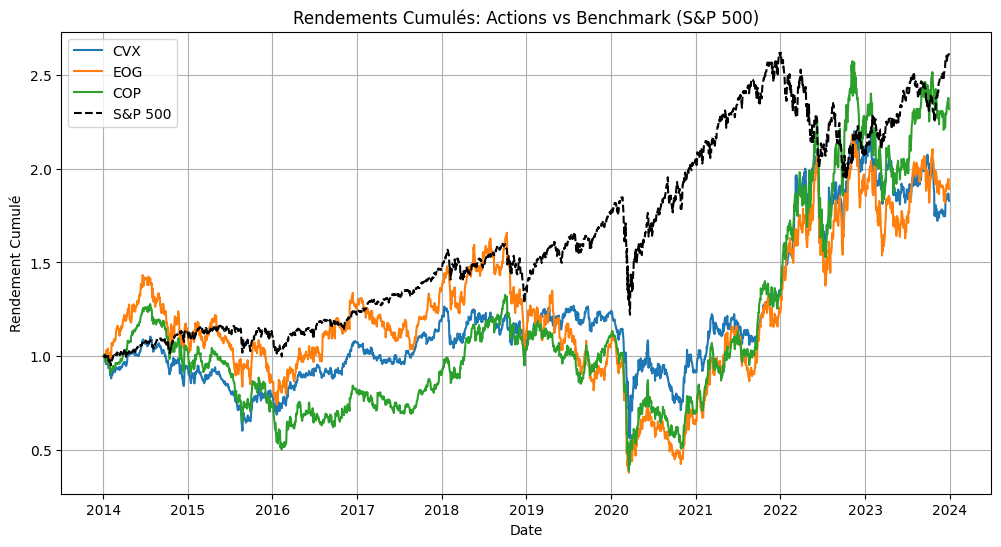

In [ ]:
plt.figure(figsize=(12, 6))


for ticker in tickers:
    plt.plot(cumulative_returns[ticker], label=ticker)


plt.plot(benchmark_cumulative_returns, label="S&P 500", linestyle='--', color='black')


plt.title("Rendements Cumulés: Actions vs Benchmark (S&P 500)")
plt.xlabel("Date")
plt.ylabel("Rendement Cumulé")
plt.legend()
plt.grid(True)
plt.show()

Regression linéaire

In [ ]:
import statsmodels.api as sm

# Définition des variables
X = benchmark_data.pct_change().dropna()
X = sm.add_constant(X)  # Ajoute une constante pour l'ordonnée à l'origine

# Régression pour chaque action
for ticker in tickers:
    Y = stocks_returns[ticker].dropna()  # Rendements de l'action

    # Aligner les dates
    X_aligned, Y_aligned = X.align(Y, join='inner', axis=0)

    # Régression linéaire
    model = sm.OLS(Y_aligned, X_aligned).fit()

    # Afficher les résultats
    print(f"\n Régression pour {ticker} :")
    print(model.summary())


 Régression pour CVX :
                            OLS Regression Results                            
Dep. Variable:                    CVX   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1538.
Date:                Wed, 12 Mar 2025   Prob (F-statistic):          7.50e-263
Time:                        18:17:54   Log-Likelihood:                 7054.3
No. Observations:                2515   AIC:                        -1.410e+04
Df Residuals:                    2513   BIC:                        -1.409e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.057e-05      0